In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Далее везде предполагается, что масса равна 1, в начальный момент времени тело находится в точке (0,0).

In [2]:
g = 9.81       
speed = 50.0               
angle_deg = 45.0
angle = np.deg2rad(angle_deg)
vx0 = speed * math.cos(angle)
vy0 = speed * math.sin(angle)
t_end = 2 * vy0 / g

In [3]:
def analytic_solution(t):
    x = vx0 * t
    y = vy0 * t - 0.5 * g * t**2
    vx = np.full_like(t, vx0)
    vy = vy0 - g * t
    return x, y, vx, vy

def energy(vx, vy, y):
    KE = 0.5  * (vx**2 + vy**2)
    PE = g * y
    return KE + PE


def euler_step(state, dt):
    # state: [x, y, vx, vy]
    x, y, vx, vy = state
    ax, ay = 0.0, -g
    x_new = x + vx * dt
    y_new = y + vy * dt
    vx_new = vx + ax * dt
    vy_new = vy + ay * dt
    return np.array([x_new, y_new, vx_new, vy_new])


def rk4_step(state, dt):
    # state: [x, y, vx, vy]
    def f(s):
        x, y, vx, vy = s
        return np.array([vx, vy, 0.0, -g])
    k1 = f(state)
    k2 = f(state + 0.5 * dt * k1)
    k3 = f(state + 0.5 * dt * k2)
    k4 = f(state + dt * k3)
    return state + (dt / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

In [4]:
def simulate(method_step, dt):
    N = int(np.floor(t_end / dt)) + 1
    t = np.array([i * dt for i in range(N)])
    state = np.array([0, 0, vx0, vy0], dtype=float)
    x = np.zeros(N) 
    y = np.zeros(N) 
    vx = np.zeros(N) 
    vy = np.zeros(N)
    E = np.zeros(N)
    for i, ti in enumerate(t):
        x[i], y[i], vx[i], vy[i] = state
        E[i] = energy(vx[i], vy[i], y[i])
        state = method_step(state, dt)
    return x, y, vx, vy, E, t

In [5]:
euler_results = simulate(euler_step, 0.1)
rk_results = simulate(rk4_step, 0.1)

In [6]:
t = rk_results[5]
xa, ya, vxa, vya = analytic_solution(t)
E_analytic = energy(vxa, vya, ya)

Построим графики траекторий.

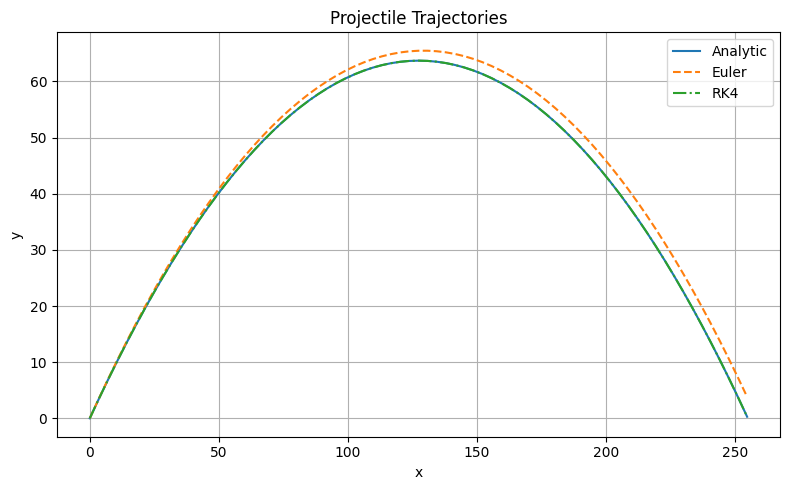

In [7]:
plt.figure(figsize=(8,5))
plt.plot(xa, ya, label="Analytic")
plt.plot(euler_results[0], euler_results[1], linestyle='--', label="Euler")
plt.plot(rk_results[0], rk_results[1], linestyle='-.', label="RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile Trajectories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

На графике аналитическое решение и решение, полученное по методу Рунге-Кутты, не отличимы. Решение, полученное по схеме Эйлера, отличается от аналитического, но сходится к нему по мере увеличения шага интегрирования (что показано визуально ниже).

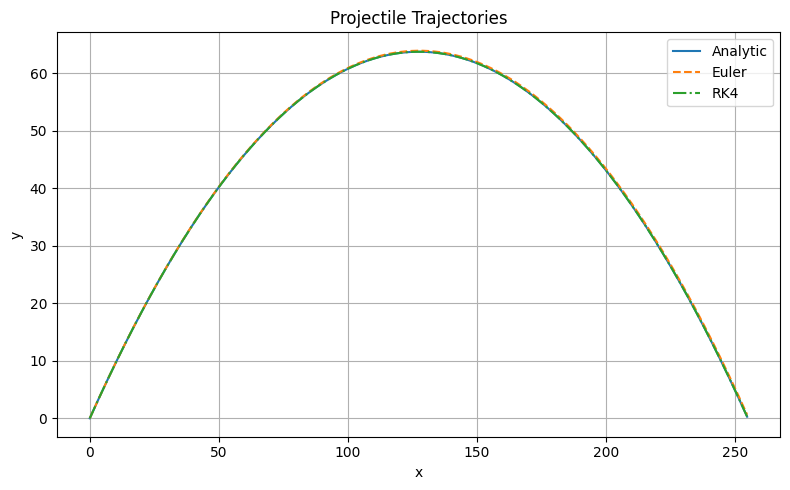

In [8]:
euler_results = simulate(euler_step, 0.01)
rk_results = simulate(rk4_step, 0.01)
t = rk_results[5]
xa, ya, vxa, vya = analytic_solution(t)
E_analytic = energy(vxa, vya, ya)

plt.figure(figsize=(8,5))
plt.plot(xa, ya, label="Analytic")
plt.plot(euler_results[0], euler_results[1], linestyle='--', label="Euler")
plt.plot(rk_results[0], rk_results[1], linestyle='-.', label="RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projectile Trajectories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Построим графики полной энергии. В данной задаче полная энергия должна быть постоянна.

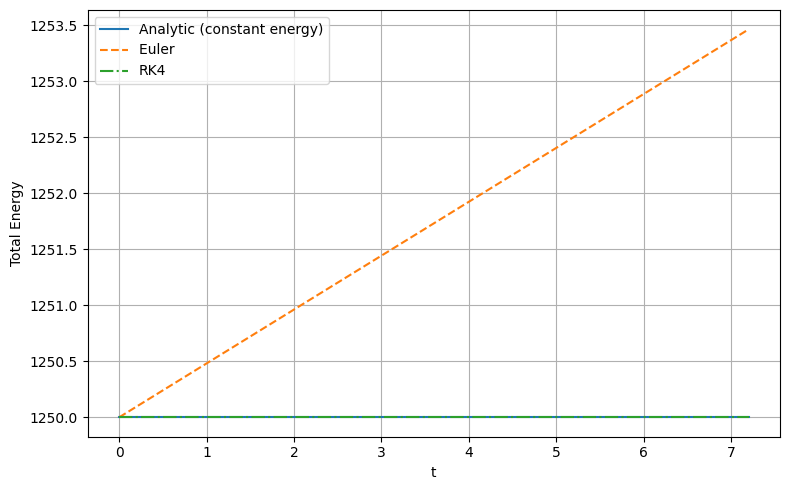

In [9]:
plt.figure(figsize=(8,5))
plt.plot(t, E_analytic, label="Analytic (constant energy)")
plt.plot(t,  euler_results[4], linestyle='--', label="Euler ")
plt.plot(t, rk_results[4], linestyle='-.', label="RK4")
plt.xlabel("t")
plt.ylabel("Total Energy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Посмотрим на разницу полных энергий.

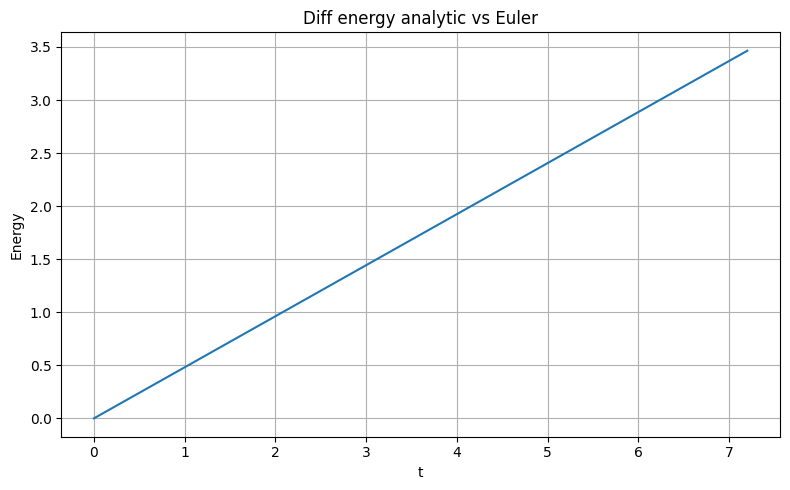

In [10]:
plt.figure(figsize=(8,5))
plt.plot(t, euler_results[4] - E_analytic)
plt.xlabel("t")
plt.ylabel("Energy")
plt.title("Diff energy analytic vs Euler")
plt.grid(True)
plt.tight_layout()
plt.show()

Видно, что в схеме Эйлера ошибка в энергии накапливается линейно.

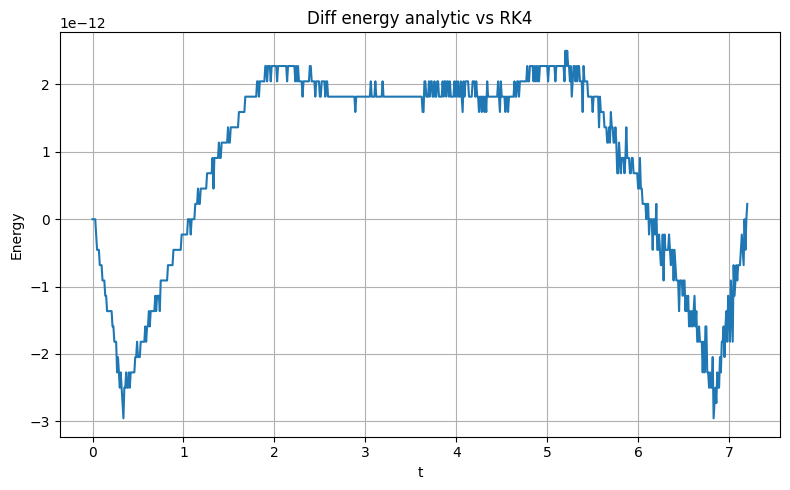

In [11]:
plt.figure(figsize=(8,5))
plt.plot(t, rk_results[4] - E_analytic)
plt.xlabel("t")
plt.ylabel("Energy")
plt.title("Diff energy analytic vs RK4")
plt.grid(True)
plt.tight_layout()
plt.show()

Видно, что в случае метода Рунге-Кутты ошибка не накапливается, проявляет осцилляции и примерно равна машинной точности. Построим графики ошибок в координатах.

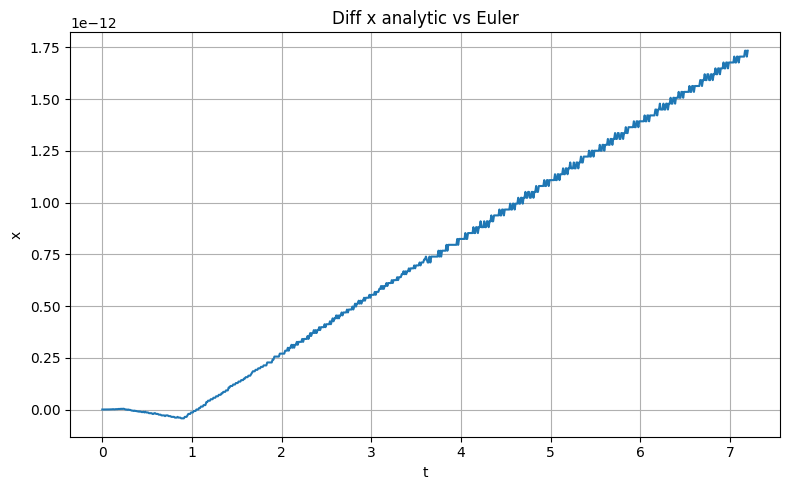

In [12]:
plt.figure(figsize=(8,5))
plt.plot(t, euler_results[0] - xa)
plt.xlabel("t")
plt.ylabel("x")
plt.title("Diff x analytic vs Euler")
plt.grid(True)
plt.tight_layout()
plt.show()

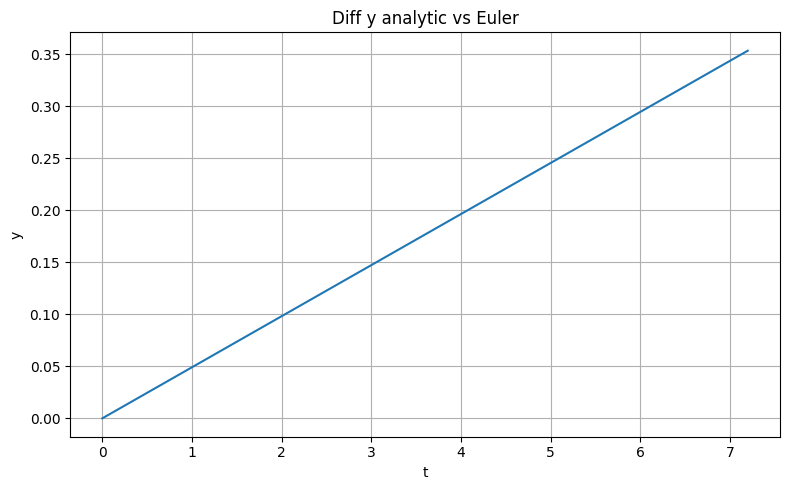

In [13]:
plt.figure(figsize=(8,5))
plt.plot(t, euler_results[1] - ya)
plt.xlabel("t")
plt.ylabel("y")
plt.title("Diff y analytic vs Euler")
plt.grid(True)
plt.tight_layout()
plt.show()

На графиках видно, что в случае метода Эйлера ошибка в координатах накапливается линейно.

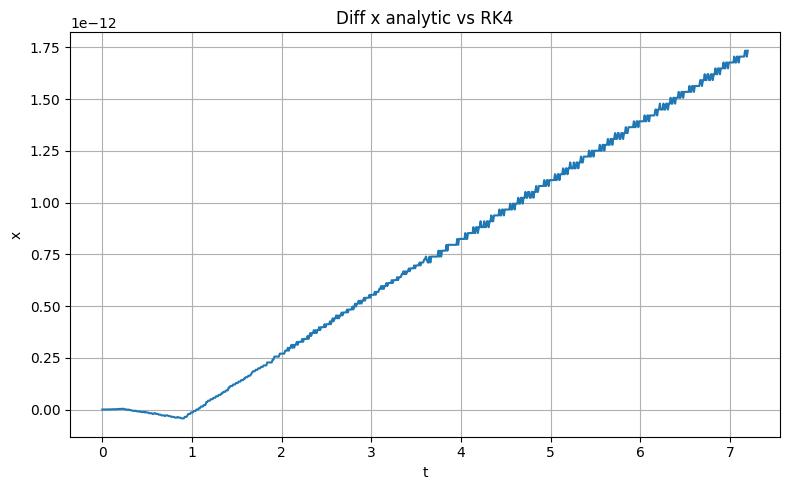

In [14]:
plt.figure(figsize=(8,5))
plt.plot(t, rk_results[0] - xa)
plt.xlabel("t")
plt.ylabel("x")
plt.title("Diff x analytic vs RK4")
plt.grid(True)
plt.tight_layout()
plt.show()

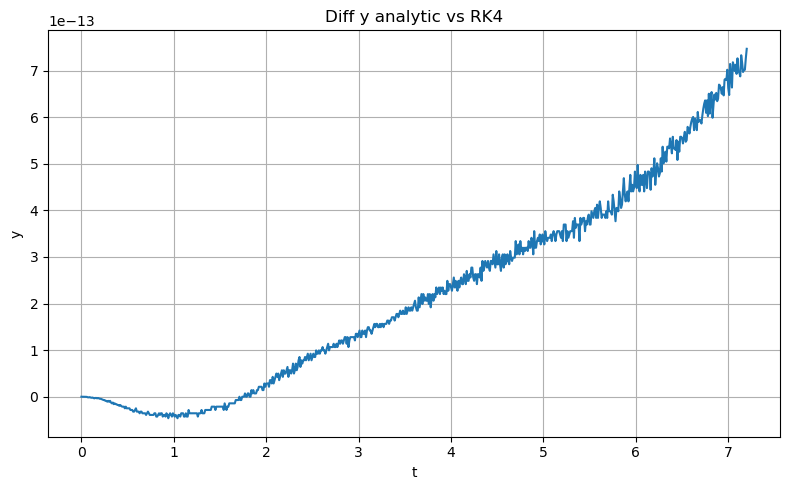

In [15]:
plt.figure(figsize=(8,5))
plt.plot(t, rk_results[1] - ya)
plt.xlabel("t")
plt.ylabel("y")
plt.title("Diff y analytic vs RK4")
plt.grid(True)
plt.tight_layout()
plt.show()

На графиках видно, что в случае метода Рунге-Кутты ошибка в координате x накапливается линейно. В координате y с некоторого времени ошибка начинает накапливаться линейно.